## importing Libraries

In [258]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Data Collection & Analysis

In [260]:
insurance_dataset = pd.read_csv('insurance.csv')
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [261]:
insurance_dataset.shape

(1338, 7)

In [262]:
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Categorical Features:
- Sex
- Smoker
- Region

In [264]:
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Data Analysis

In [266]:
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Figure size 600x600 with 0 Axes>

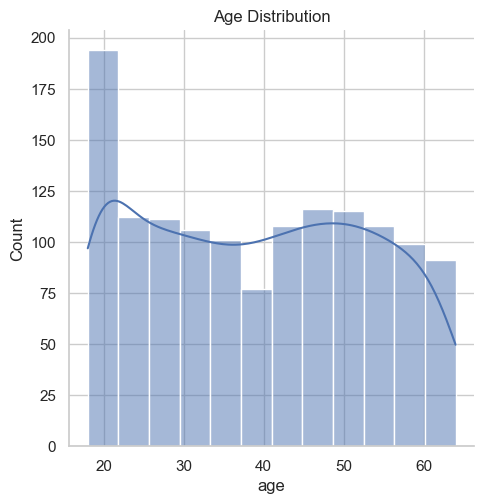

In [267]:
# distribution of age value
# sns.set()
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['age'], kde=True)
plt.title('Age Distribution')
plt.show()

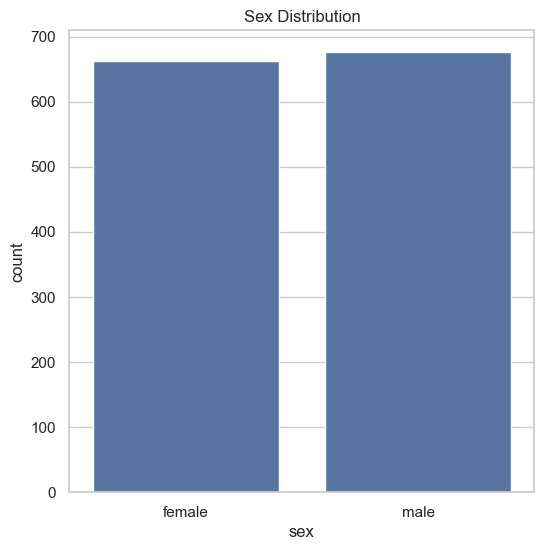

In [268]:
# distribution of Gender value
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data = insurance_dataset)
plt.title('Sex Distribution')
plt.show()

In [269]:
insurance_dataset.sex.value_counts()

sex
male      676
female    662
Name: count, dtype: int64

<Figure size 600x600 with 0 Axes>

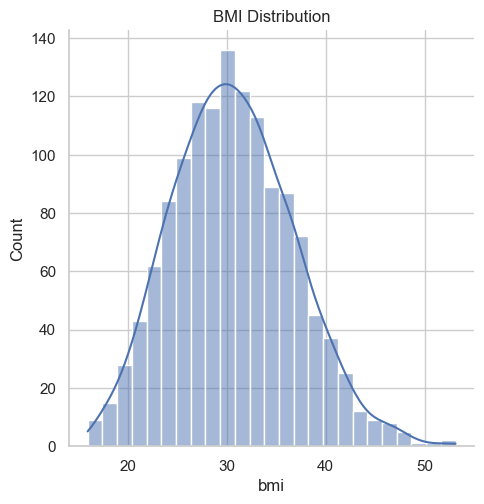

In [270]:
# bmi distribution
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['bmi'], kde=True)
plt.title('BMI Distribution')
plt.show()

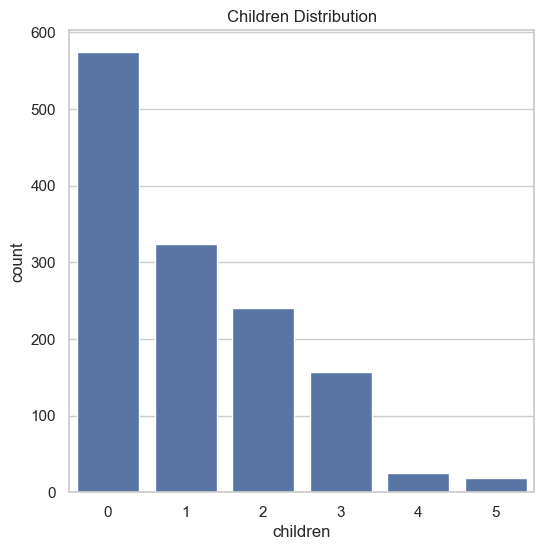

In [271]:
# Children Countplot
sns.set(style="whitegrid")
plt.figure(figsize=(6,6))
sns.countplot(x='children', data = insurance_dataset)
plt.title('Children Distribution')
plt.show()

In [272]:
insurance_dataset['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

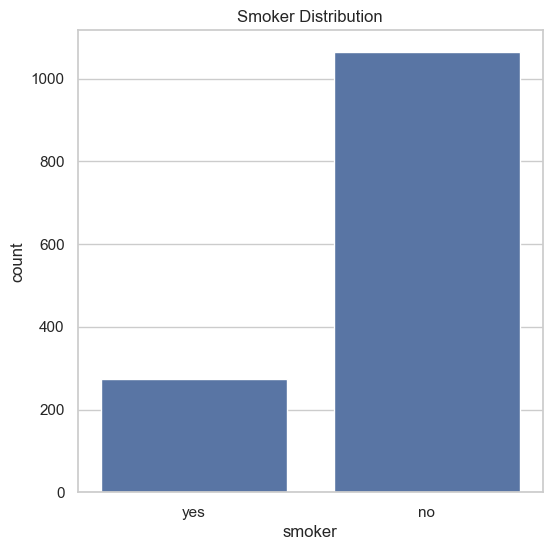

In [273]:
# Smoker Countplot
sns.set(style="whitegrid")
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data = insurance_dataset)
plt.title('Smoker Distribution')
plt.show()

In [274]:
insurance_dataset['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

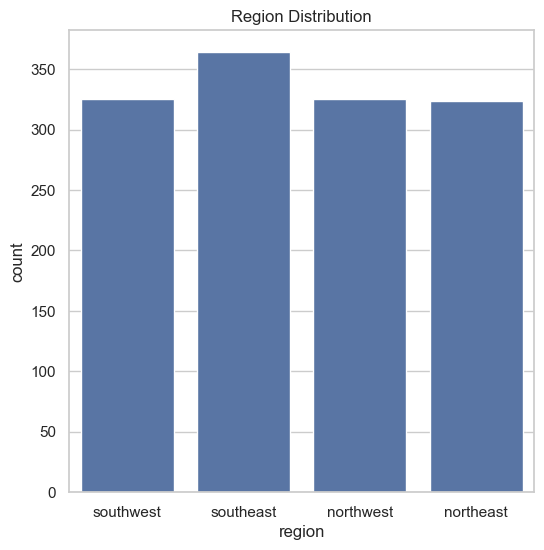

In [275]:
# Region Countplot
sns.set(style="whitegrid")
plt.figure(figsize=(6,6))
sns.countplot(x='region', data = insurance_dataset)
plt.title('Region Distribution')
plt.show()

In [276]:
insurance_dataset['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

<Figure size 600x600 with 0 Axes>

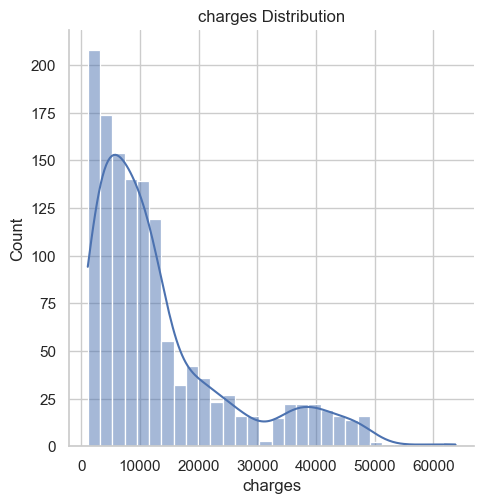

In [277]:
# charges distribution
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['charges'], kde=True)
plt.title('charges Distribution')
plt.show()

## Data Pre-Processing

### Encoding Categorical Featuers

In [280]:
# encoding sex column
insurance_dataset.replace({'sex': {'male': 0, 'female': 1}}, inplace=True)

# encoding smoker column
insurance_dataset.replace({'smoker': {'yes': 0, 'no': 1}}, inplace=True)

# encoding region column
insurance_dataset.replace({'region': {'southeast': 0, 'southwest': 1, 'northeast':2 , 'northwest':3}}, inplace=True)

C:\Users\minam\AppData\Local\Temp\ipykernel_20804\2188745159.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_dataset.replace({'sex': {'male': 0, 'female': 1}}, inplace=True)
C:\Users\minam\AppData\Local\Temp\ipykernel_20804\2188745159.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_dataset.replace({'smoker': {'yes': 0, 'no': 1}}, inplace=True)
C:\Users\minam\AppData\Local\Temp\ipykernel_20804\2188745159.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future 

In [281]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


## Splitting the Features and Target

In [283]:
X = insurance_dataset.drop(columns='charges', axis = 1)
Y = insurance_dataset['charges']

## Train Test Split

In [285]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [286]:
(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

((1070, 6), (268, 6), (1070,), (268,))

## Model Training

In [288]:
# loading the Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

## Model Evaluation

In [290]:
training_data_predictions = regressor.predict(X_train)
r2_train = metrics.r2_score(Y_train, training_data_predictions)
print('R squared value: ', r2_train)

R squared value:  0.7504144725749599


In [291]:
test_data_predictions = regressor.predict(X_test)
r2_test = metrics.r2_score(Y_test, test_data_predictions)
print('R squred value: ', r2_test)

R squred value:  0.7476989423423108
